# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

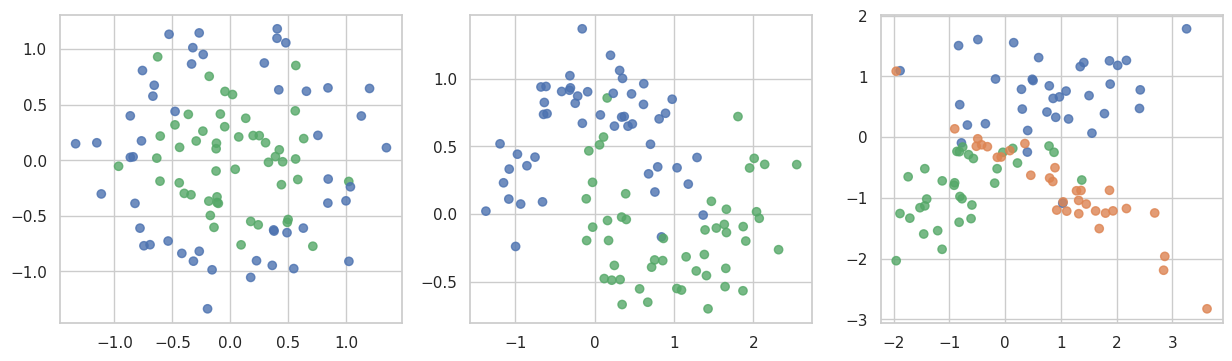

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

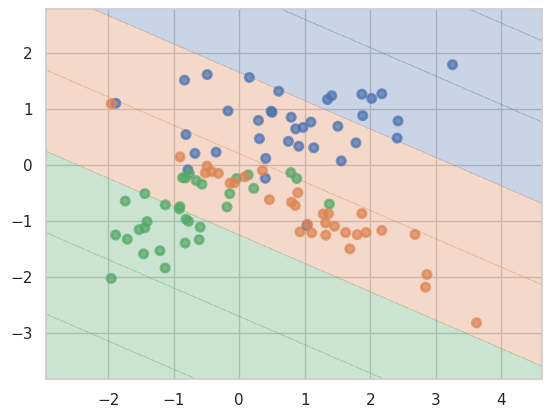

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset 1:
  Training Accuracy: 1.0000
  Testing Accuracy:  0.7333


Dataset 2:
  Training Accuracy: 1.0000
  Testing Accuracy:  0.8667


Dataset 3:
  Training Accuracy: 1.0000
  Testing Accuracy:  0.8333




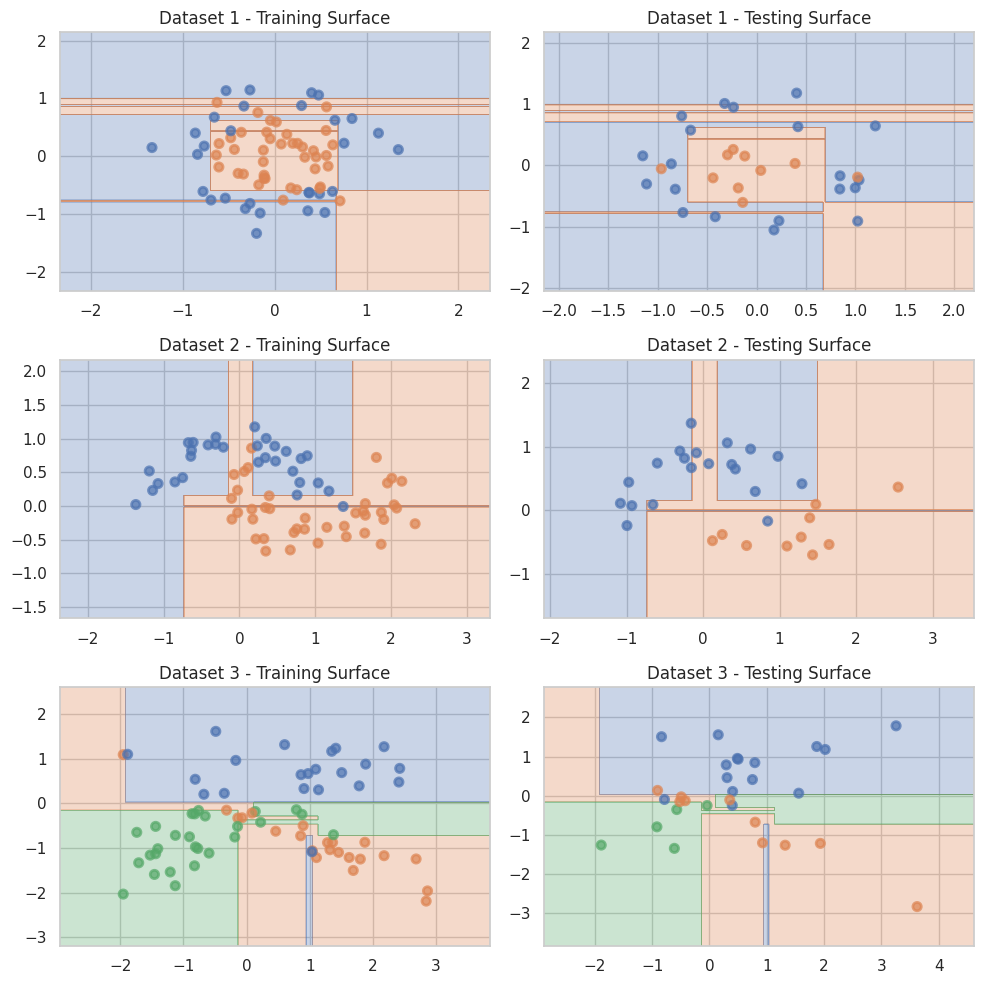

In [ ]:
from sklearn.metrics import accuracy_score

trained_models_data = []
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    trained_models_data.append({
        'dataset_index': i,
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'model': clf
    })

plt.figure(figsize=(10, 10))
for i, model_data in enumerate(trained_models_data):
    X_train = model_data['X_train']
    X_test = model_data['X_test']
    y_train = model_data['y_train']
    y_test = model_data['y_test']
    clf = model_data['model']

    plt.subplot(3, 2, 2*i + 1)
    plt.title(f'Dataset {i+1} - Training Surface')
    plot_surface(clf, X_train, y_train)

    plt.subplot(3, 2, 2*i + 2)
    plt.title(f'Dataset {i+1} - Testing Surface')

    plot_surface(clf, X_test, y_test)

    train_preds = clf.predict(X_train)
    test_preds = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)

    print(f"Dataset {i+1}:")
    print(f"  Training Accuracy: {train_accuracy:.4f}")
    print(f"  Testing Accuracy:  {test_accuracy:.4f}")
    print("\n")

plt.tight_layout()
plt.show()

__Ответ:__ Деревья сильно переобучились. На обучающей выборке они показали идеальный результат (accuracy = 1.0), в то время как на тестовой результат сильно хуже.

> Добавить блок с цитатой



__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

max_depth_values: [1, 5, 10, None]
min_samples_leaf_values: [1, 5, 10, 20]


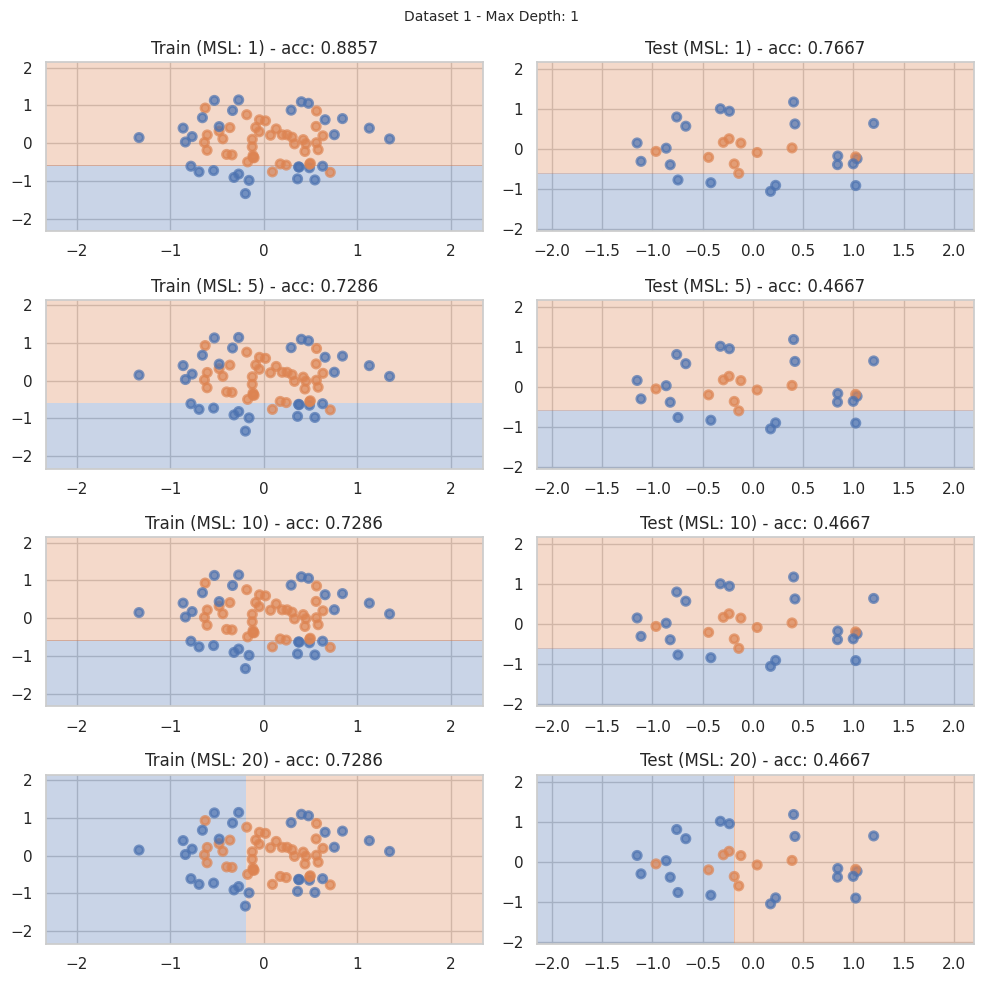

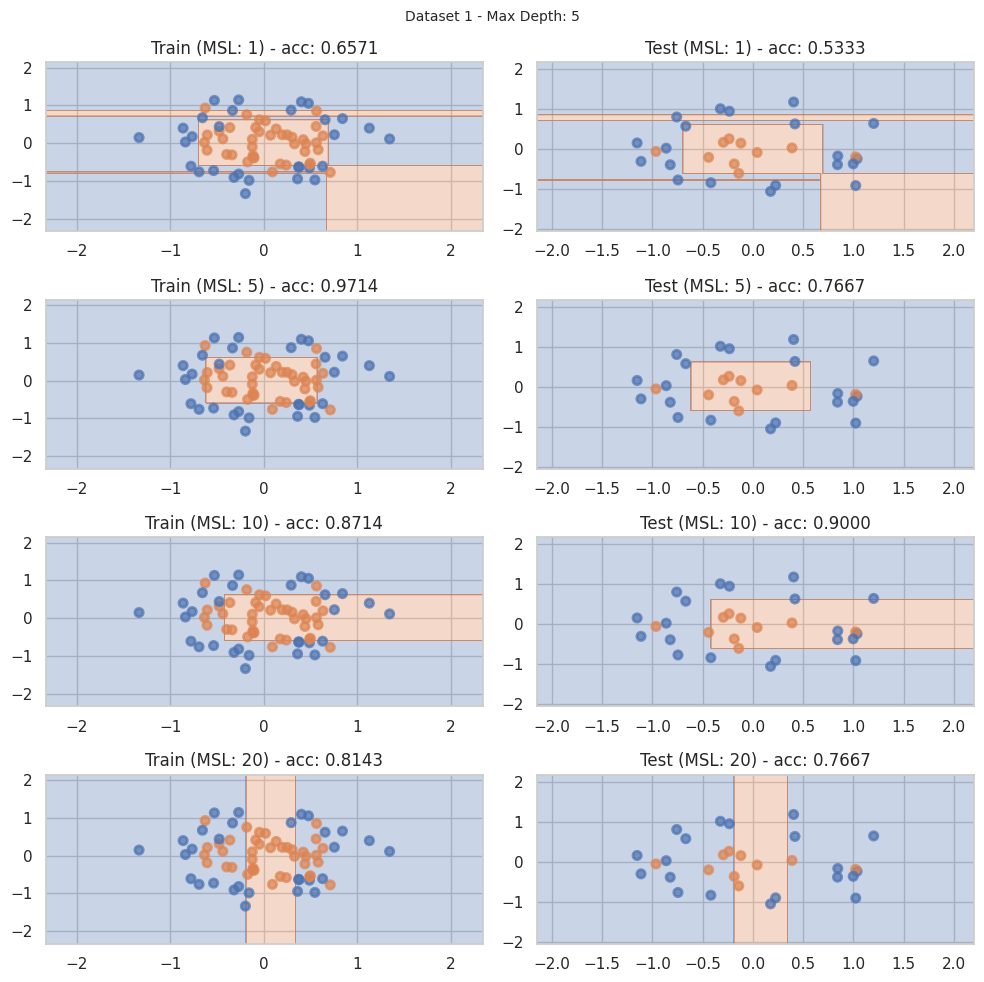

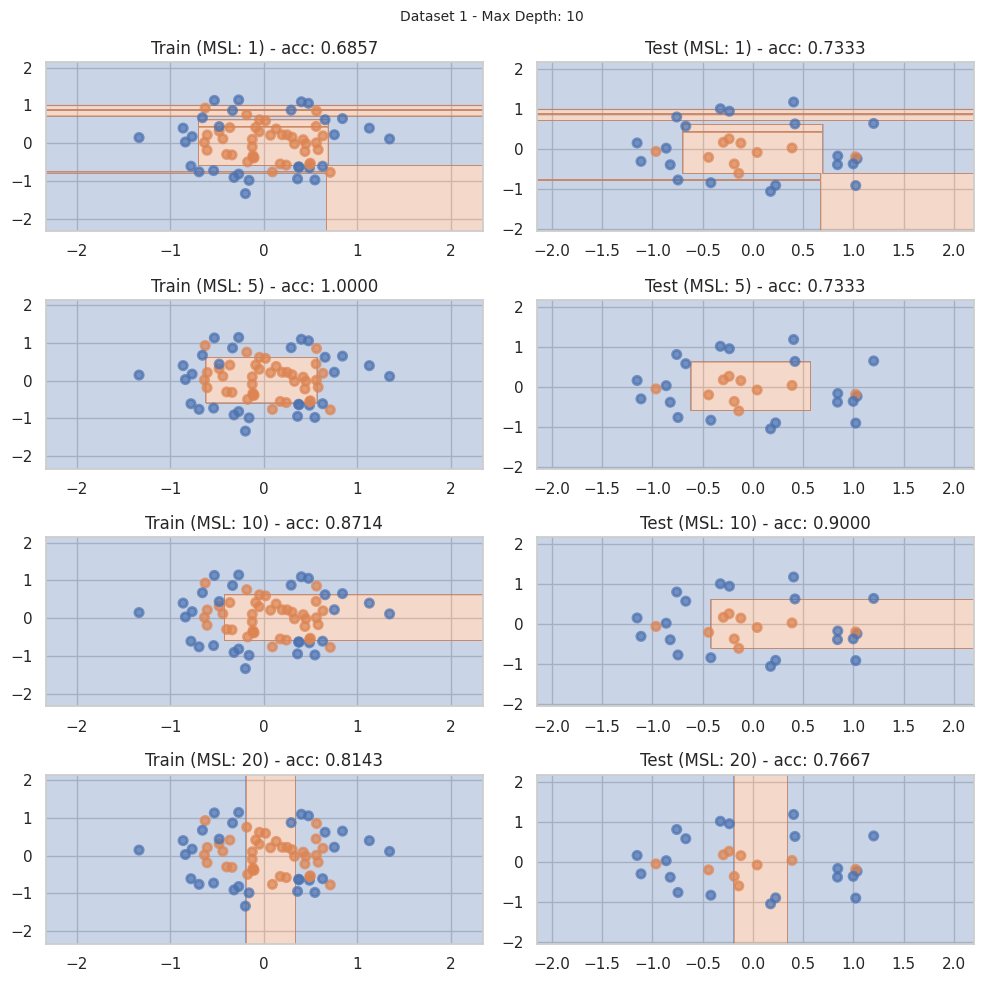

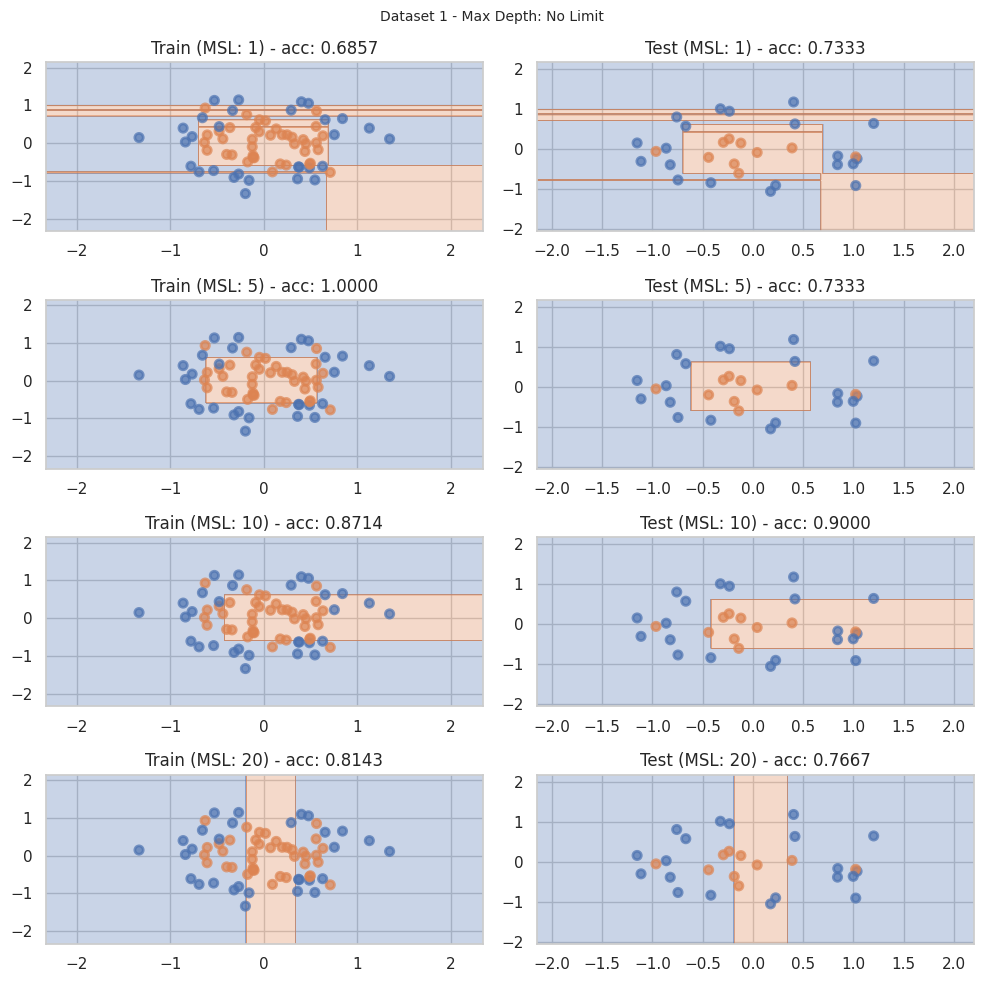

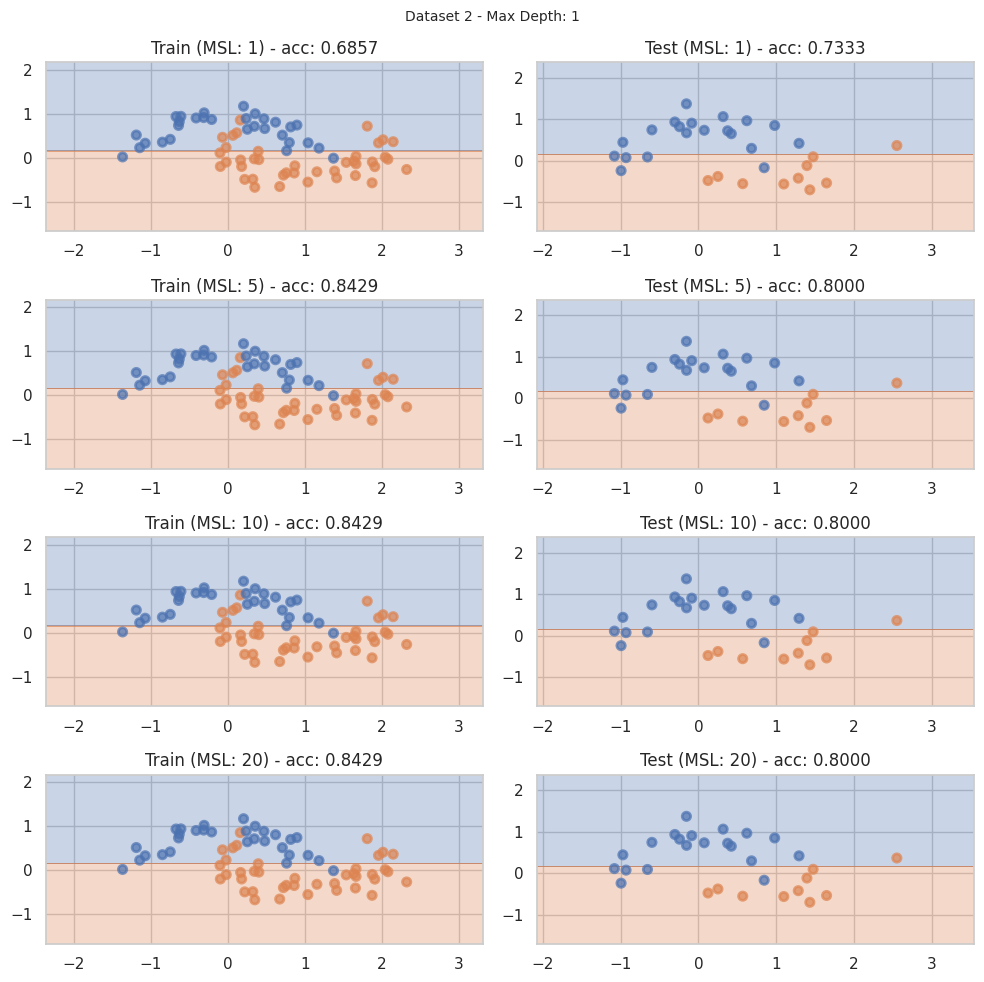

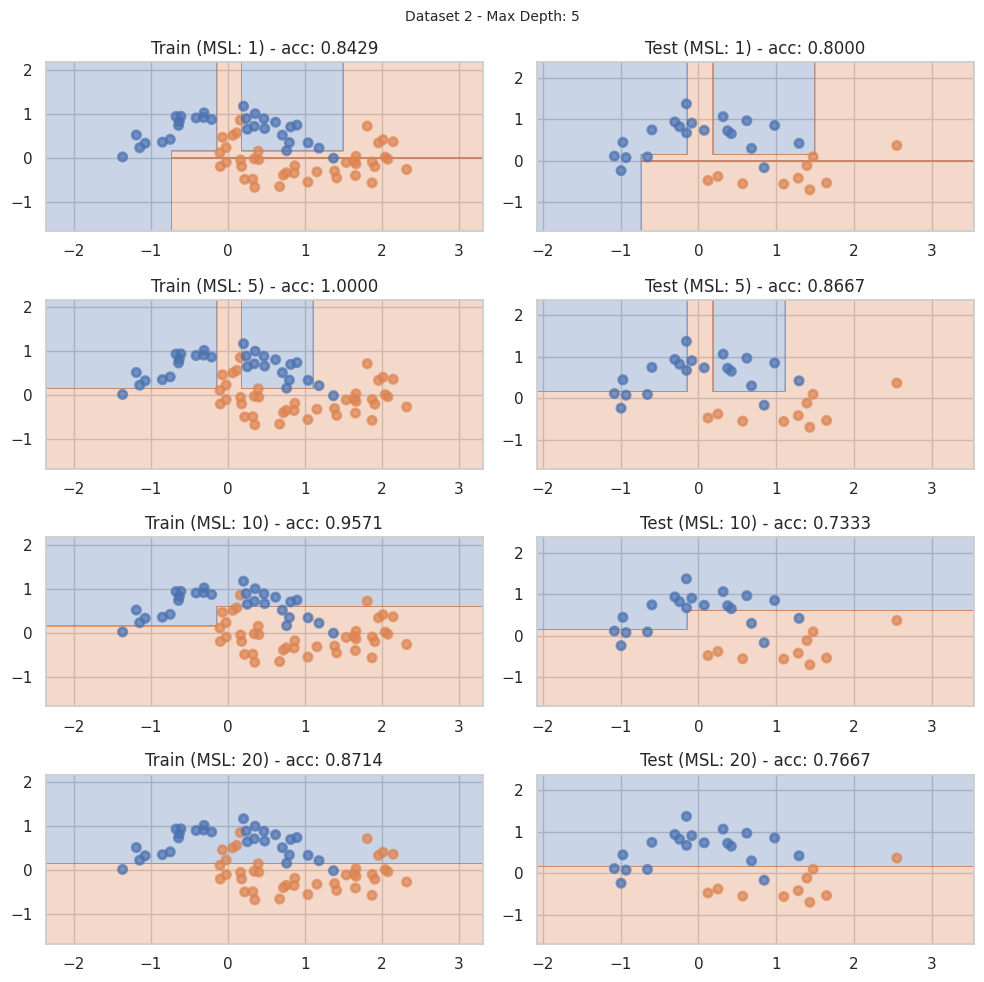

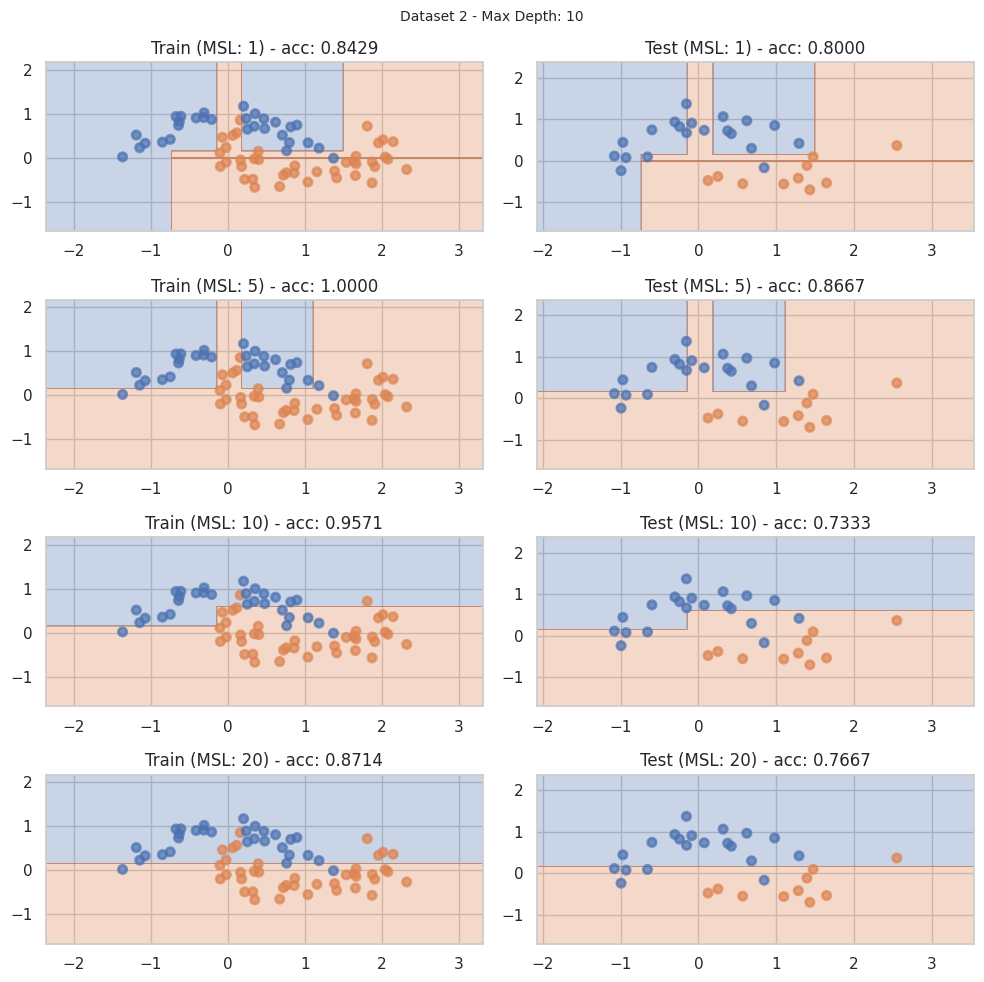

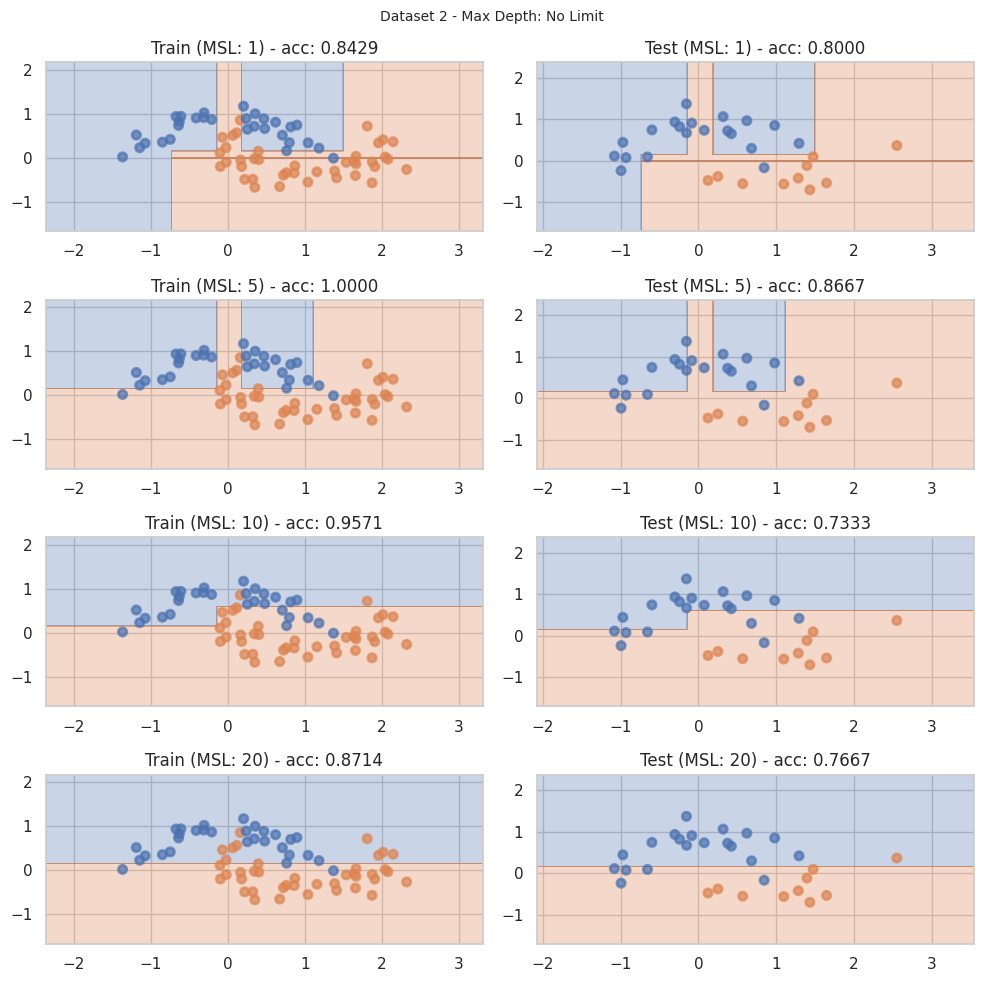

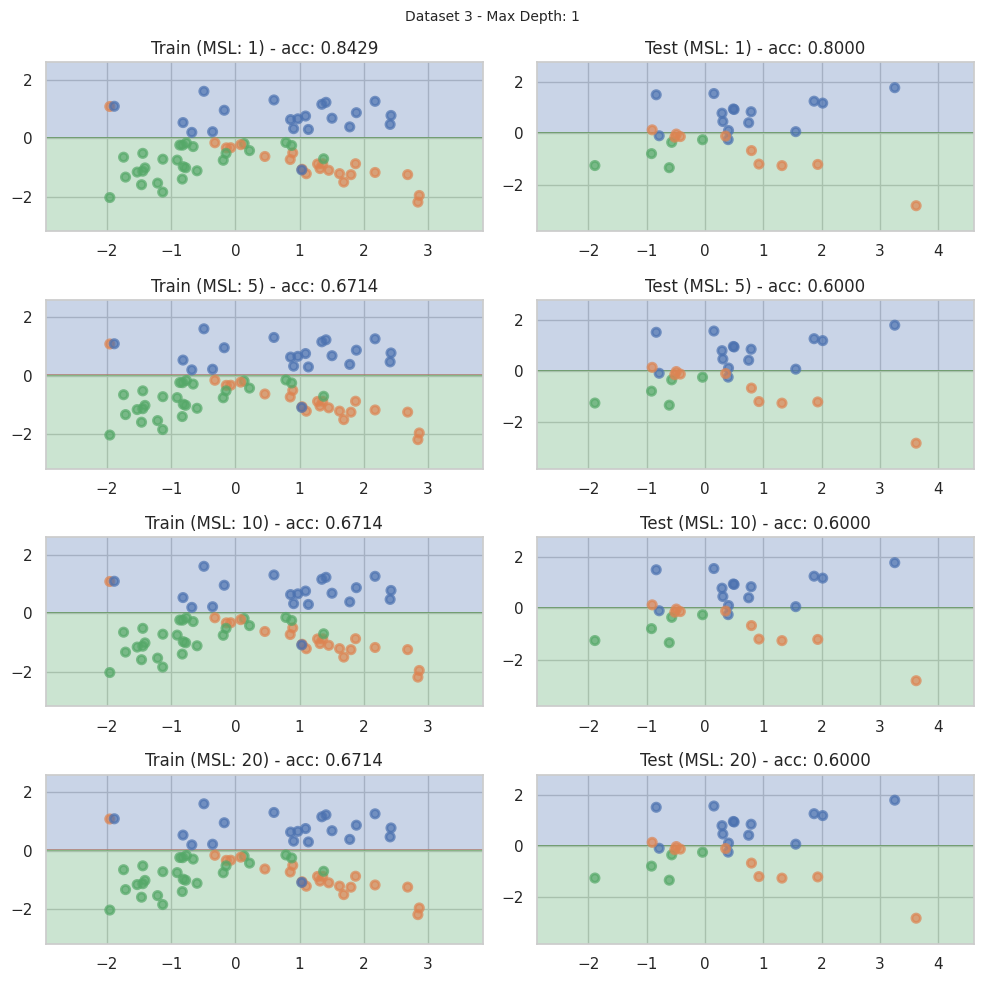

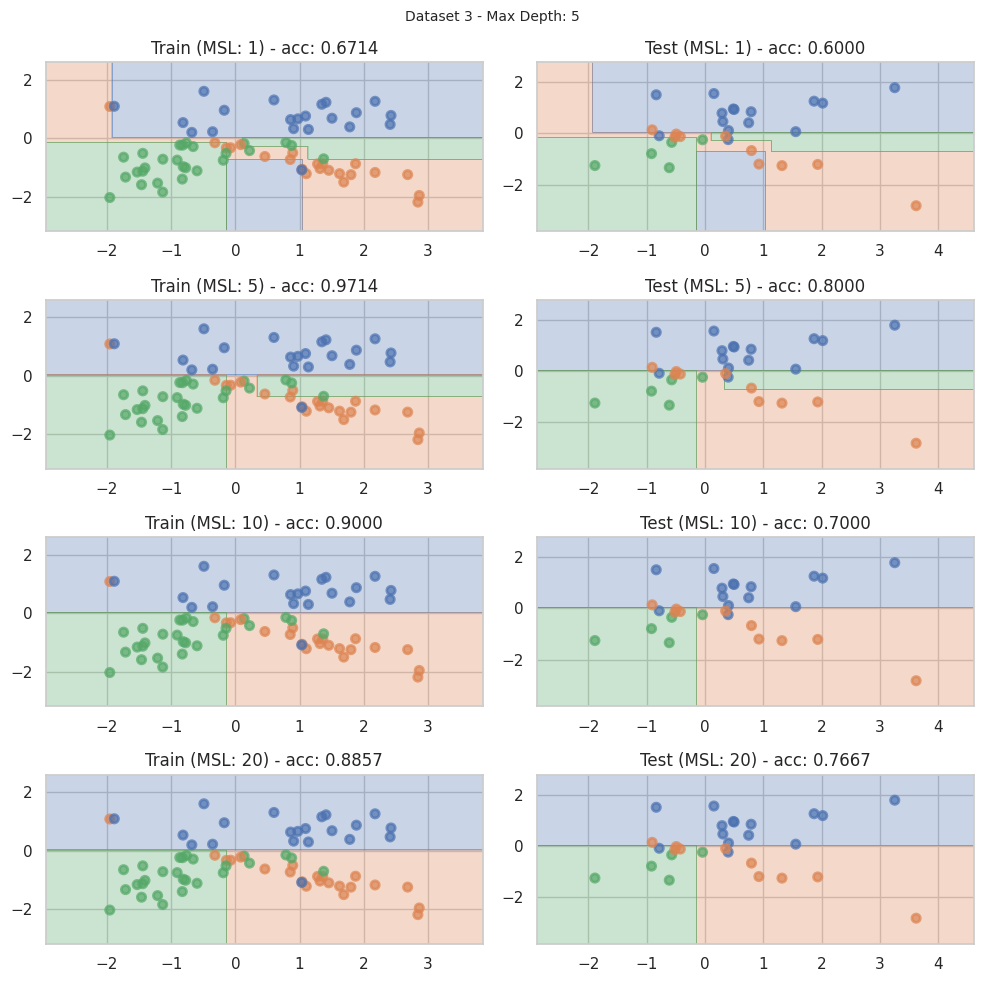

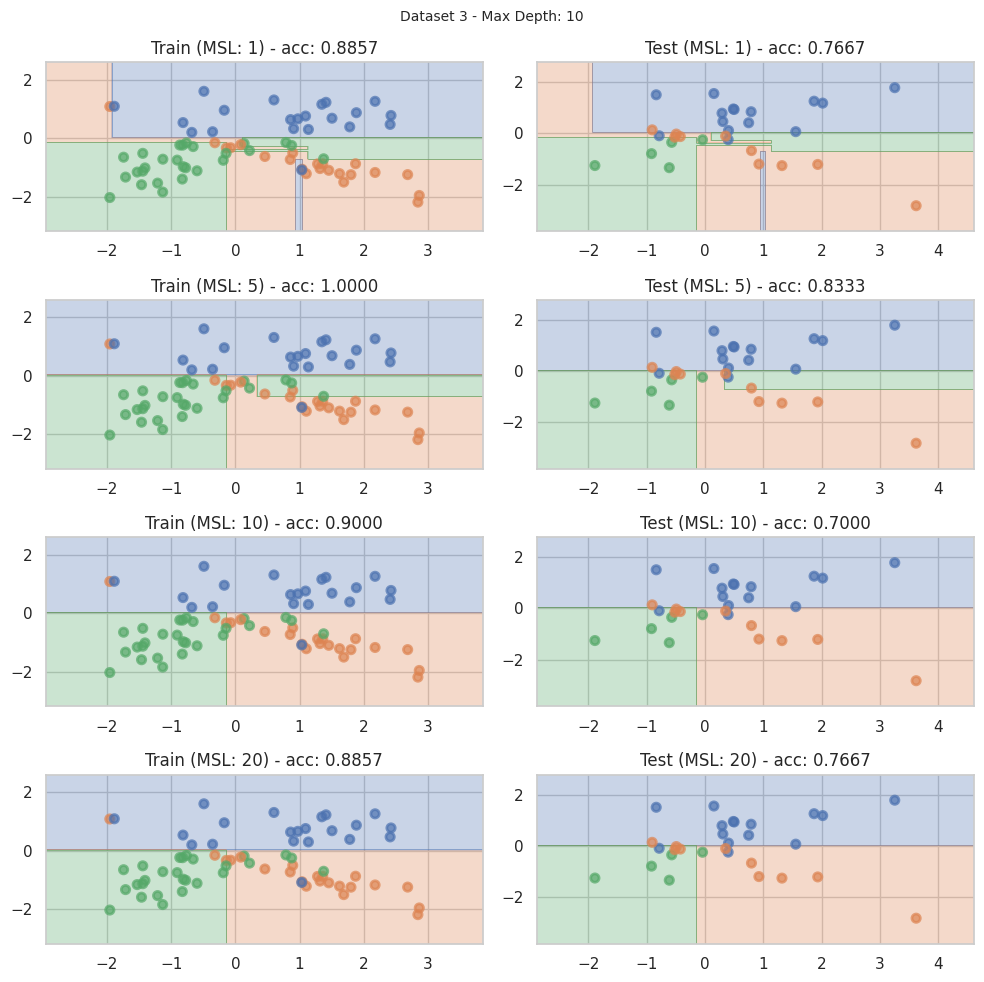

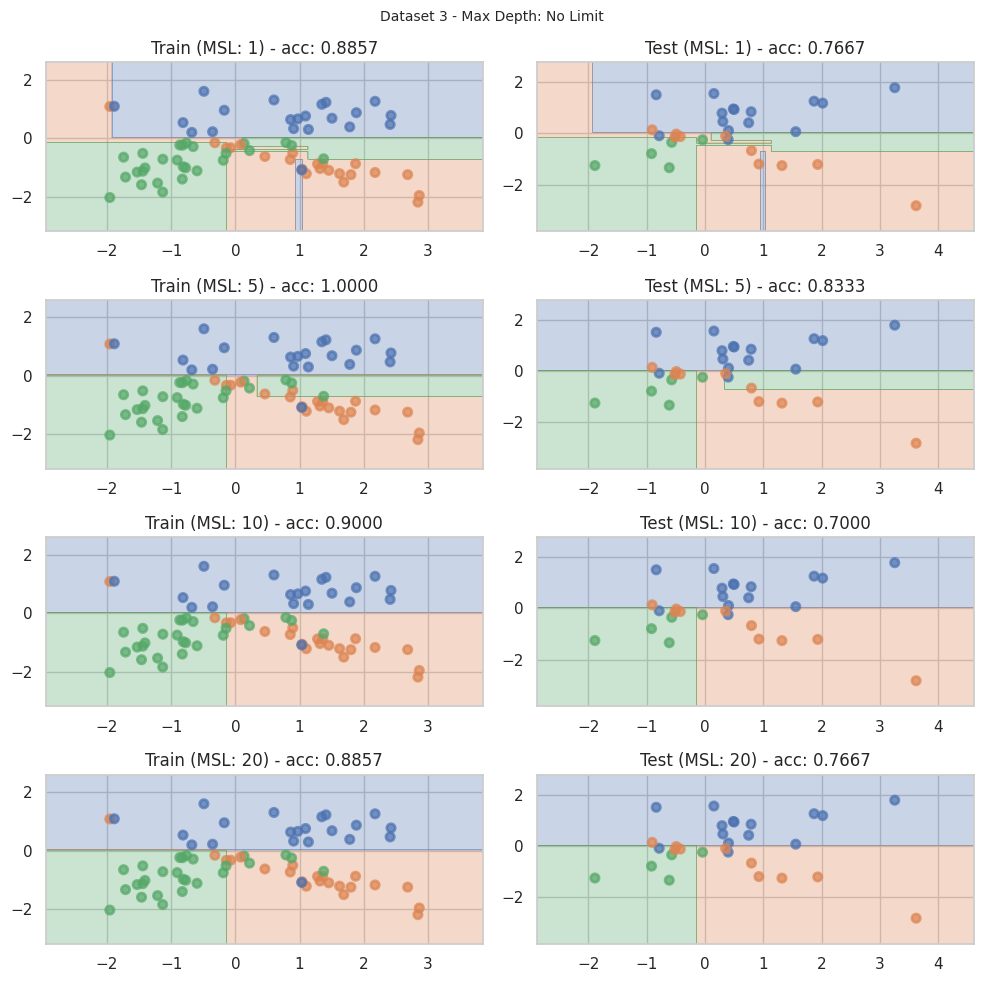

In [ ]:
max_depth_values = [1, 5, 10, None]
min_samples_leaf_values = [1, 5, 10, 20]

print(f"max_depth_values: {max_depth_values}")
print(f"min_samples_leaf_values: {min_samples_leaf_values}")

regularized_models_data = []

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    for md in max_depth_values:
        for msl in min_samples_leaf_values:
            clf = DecisionTreeClassifier(max_depth=md, min_samples_leaf=msl, random_state=42)
            clf.fit(X_train, y_train)

            regularized_models_data.append({
                'dataset_index': i,
                'max_depth': md,
                'min_samples_leaf': msl,
                'X_train': X_train,
                'X_test': X_test,
                'y_train': y_train,
                'y_test': y_test,
                'model': clf
            })

grouped_models = {}
for model_data in regularized_models_data:
    ds_idx = model_data['dataset_index']
    md = model_data['max_depth']
    if ds_idx not in grouped_models:
        grouped_models[ds_idx] = {}
    if md not in grouped_models[ds_idx]:
        grouped_models[ds_idx][md] = []
    grouped_models[ds_idx][md].append(model_data)

for ds_idx, md_group in grouped_models.items():
    for md, models_list in md_group.items():
        models_list.sort(key=lambda x: x['min_samples_leaf'])

        num_msl = len(models_list)

        plt.figure(figsize=(10, 10))
        plt.suptitle(f'Dataset {ds_idx+1} - Max Depth: {md if md is not None else "No Limit"}', fontsize=10)
        for j, model_data in enumerate(models_list):
            X_train = model_data['X_train']
            X_test = model_data['X_test']
            y_train = model_data['y_train']
            y_test = model_data['y_test']
            clf = model_data['model']
            msl = model_data['min_samples_leaf']

            plt.subplot(num_msl, 2, 2*j + 1)
            plt.title(f'Train (MSL: {msl}) - acc: {train_accuracy:.4f}')
            plot_surface(clf, X_train, y_train)

            plt.subplot(num_msl, 2, 2*j + 2)
            plt.title(f'Test (MSL: {msl}) - acc: {test_accuracy:.4f}')
            plot_surface(clf, X_test, y_test)

            train_preds = clf.predict(X_train)
            test_preds = clf.predict(X_test)
            train_accuracy = accuracy_score(y_train, train_preds)
            test_accuracy = accuracy_score(y_test, test_preds)

        plt.tight_layout()
        plt.show()

Ответ:  Более низкие значения max_depth и более высокие значения min_samples_leaf приводят к более простым решающим границам, что указывает на более сильную регуляризацию. Более сильная регуляризация обычно приводит к снижению точности на обучающей выборке, но может улучшить точность на тестовой выборке, уменьшая переобучение. Однако для каждого набора данных нужно найти оптимальные значения параметров, чтобы добиться хорошего результата. Чрезмерно сильная регуляризация может привести к недообучению, тогда как слишком слабая регуляризация вызывает переобучение. Изменение параметров оказывает разное влияние на разных датасетах, однако некоторые тенденции сохраняются между всеми датасетами (например, max depth = 1 стабильно приводит к недообучению)

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [160]:
import gdown
url = "https://drive.google.com/uc?export=download&id=19LxFlETsLG_xLhF22dqg2P_PE5f2GANv"
output = 'data.csv'
gdown.download(url, output, quiet=False)
df = pd.read_csv('data.csv')
print(df.head())

Downloading...
From: https://drive.google.com/uc?export=download&id=19LxFlETsLG_xLhF22dqg2P_PE5f2GANv
To: /content/data.csv
100%|██████████| 7.25k/7.25k [00:00<00:00, 17.2MB/s]

    STG   SCG   STR   LPR   PEG  UNS
0  0.00  0.00  0.00  0.00  0.00    0
1  0.08  0.08  0.10  0.24  0.90    1
2  0.06  0.06  0.05  0.25  0.33    0
3  0.10  0.10  0.15  0.65  0.30    1
4  0.08  0.08  0.08  0.98  0.24    0


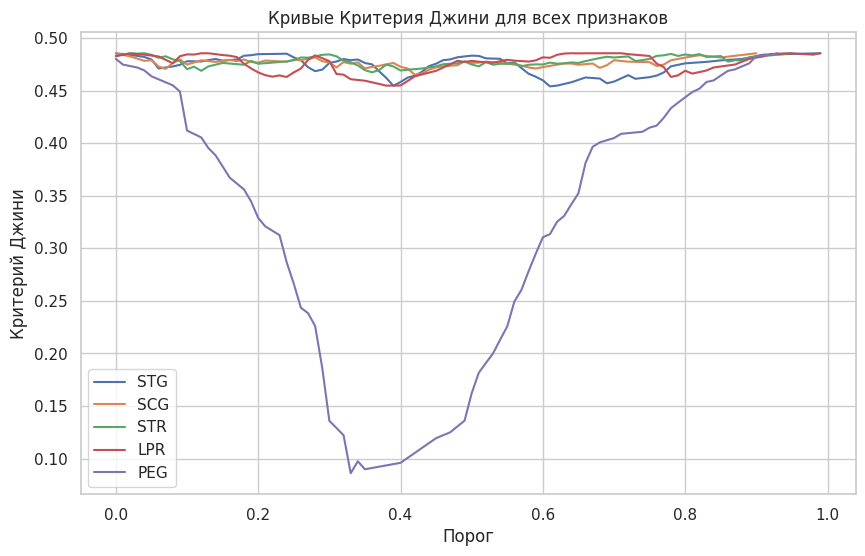

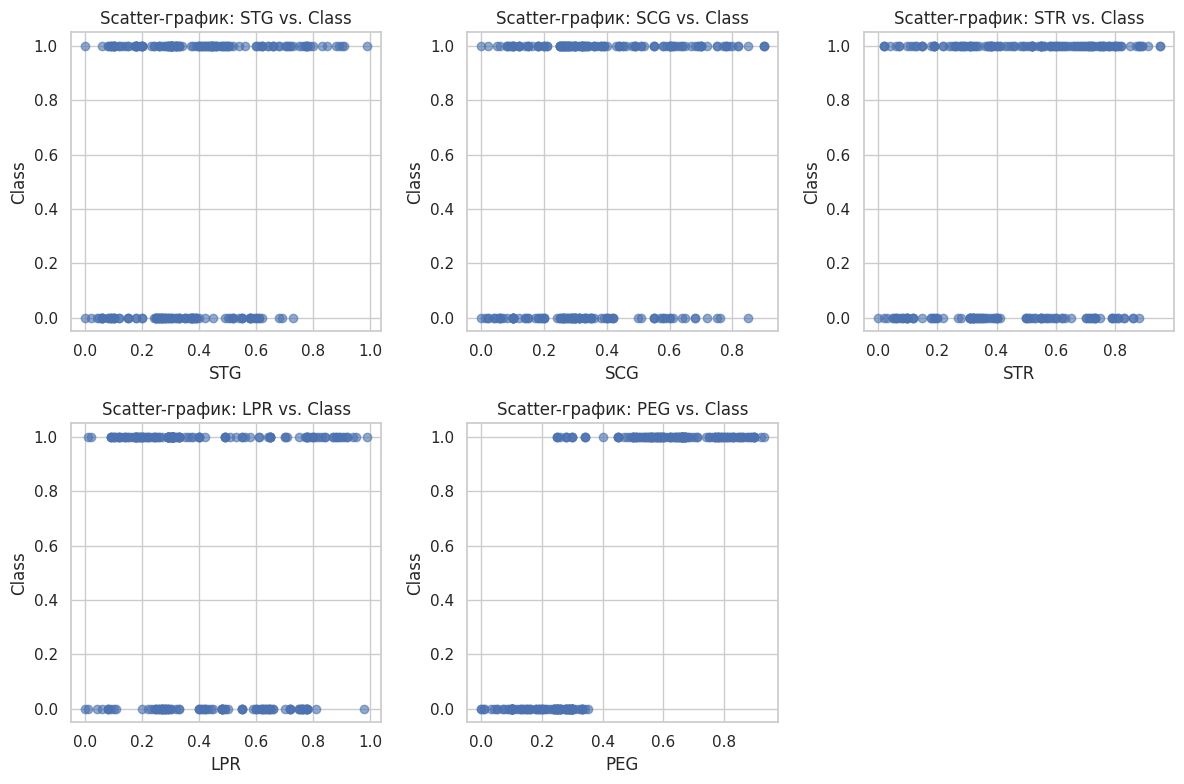

In [164]:
X = df.iloc[:, :5]
y = df.iloc[:, 5]
print("Features (X) head:\n", X.head())
print("\nTarget (y) head:\n", y.head())

def gini_impurity(y_left, y_right):
    def calculate_node_gini(y):
        if len(y) == 0:
            return 0.0

        classes, counts = np.unique(y, return_counts=True)
        proportions = counts / len(y)
        gini = 1.0 - np.sum(proportions**2)
        return gini

    gini_left = calculate_node_gini(y_left)
    gini_right = calculate_node_gini(y_right)
    n_left = len(y_left)
    n_right = len(y_right)
    n_total = n_left + n_right

    if n_total == 0:
        weighted_gini = 0.0
    else:
        weighted_gini = (n_left / n_total) * gini_left + (n_right / n_total) * gini_right

    return weighted_gini

print("gini_impurity function defined.")

plt.figure(figsize=(10, 6))

for feature_name in X.columns:
    feature_values = X[feature_name].values
    thresholds = np.sort(np.unique(feature_values))

    gini_values = []
    for threshold in thresholds:
        y_left = y[feature_values <= threshold]
        y_right = y[feature_values > threshold]

        current_gini = gini_impurity(y_left, y_right)
        gini_values.append(current_gini)

    plt.plot(thresholds, gini_values, label=feature_name)

plt.title('Gini Impurity Curves for Each Feature')
plt.xlabel('Threshold')
plt.ylabel('Gini Impurity')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 8))

for i, feature_name in enumerate(X.columns):
    plt.subplot(2, 3, i + 1)
    plt.scatter(X[feature_name], y, alpha=0.6)
    plt.title(f'Scatter Plot of {feature_name} vs. Class')
    plt.xlabel(feature_name)
    plt.ylabel('Class')
    plt.grid(True)

plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Исходя из графика, деление выборки стоит производить по признаку PEG. Scatter-график для него показывает относительно четкое разделение между двумя классами (0 и 1). При низких значениях PEG преобладает класс 0, а при высоких значениях становится более распространенным класс 1. Это разделение хорошо согласуется с его кривой критерия Джини, которая значительно снижается, что указывает на эффективное разделение. Для хороших признаков, вид кривой должен обладать характеристиками очень маленького и ярко выраженного минимального значения и резкими спадами, в то время как кривые для признаков, деление по которым почти невозможно имеют большое значение минимума, не обладают резкими и выраженными спадами и визуально выделяющейся точкой разделения

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
url = "https://drive.google.com/uc?export=download&id=1tWJVnQFmOw8GjQbOhgBgtqy8T_mpiNT5"
output = 'data1.csv'
gdown.download(url, output, quiet=False)
df = pd.read_csv('data1.csv')
print(df.head())

Downloading...
From: https://drive.google.com/uc?export=download&id=1tWJVnQFmOw8GjQbOhgBgtqy8T_mpiNT5
To: /content/data1.csv
100%|██████████| 374k/374k [00:00<00:00, 25.7MB/s]

   p  x  s  n  t p.1  f  c n.1  k  ... s.2  w w.1 p.2 w.2  o p.3 k.1 s.3  u
0  e  x  s  y  t   a  f  c   b  k  ...   s  w   w   p   w  o   p   n   n  g
1  e  b  s  w  t   l  f  c   b  n  ...   s  w   w   p   w  o   p   n   n  m
2  p  x  y  w  t   p  f  c   n  n  ...   s  w   w   p   w  o   p   k   s  u
3  e  x  s  g  f   n  f  w   b  k  ...   s  w   w   p   w  o   e   n   a  g
4  e  x  y  y  t   a  f  c   b  n  ...   s  w   w   p   w  o   p   k   n  g

[5 rows x 23 columns]


In [95]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.columns:
    df[column] = le.fit_transform(df[column])

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

print("DataFrame after Label Encoding:")
print(df.head())
print("\nFeatures (X) head after preprocessing:")
print(X.head())
print("\nTarget (y) head after preprocessing:")
print(y.head())

DataFrame after Label Encoding:
   p  x  s  n  t  p.1  f  c  n.1  k  ...  s.2  w  w.1  p.2  w.2  o  p.3  k.1  \
0  0  5  2  9  1    0  1  0    0  4  ...    2  7    7    0    2  1    4    3   
1  0  0  2  8  1    3  1  0    0  5  ...    2  7    7    0    2  1    4    3   
2  1  5  3  8  1    6  1  0    1  5  ...    2  7    7    0    2  1    4    2   
3  0  5  2  3  0    5  1  1    0  4  ...    2  7    7    0    2  1    0    3   
4  0  5  3  9  1    0  1  0    0  5  ...    2  7    7    0    2  1    4    2   

   s.3  u  
0    2  1  
1    2  3  
2    3  5  
3    0  1  
4    2  1  

[5 rows x 23 columns]

Features (X) head after preprocessing:
   x  s  n  t  p.1  f  c  n.1  k  e  ...  s.2  w  w.1  p.2  w.2  o  p.3  k.1  \
0  5  2  9  1    0  1  0    0  4  0  ...    2  7    7    0    2  1    4    3   
1  0  2  8  1    3  1  0    0  5  0  ...    2  7    7    0    2  1    4    3   
2  5  3  8  1    6  1  0    1  5  0  ...    2  7    7    0    2  1    4    2   
3  5  2  3  0    5  1  1    0  4

In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (4061, 22)
X_test shape: (4062, 22)
y_train shape: (4061,)
y_test shape: (4062,)


In [146]:
from importlib import reload
import hw2code

reload(hw2code)
from hw2code import DecisionTree
from sklearn.metrics import accuracy_score

feature_types = ['categorical'] * X.shape[1]

X_train_reset = X_train.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

X_train_np = X_train_reset.values
y_train_np = y_train_reset.values
X_test_np = X_test_reset.values
y_test_np = y_test_reset.values
my_tree = DecisionTree(feature_types=feature_types)
my_tree.fit(X_train_np, y_train_np)

y_pred = my_tree.predict(X_test_np)

accuracy = accuracy_score(y_test_np, y_pred)

print(f"Accuracy of DecisionTree: {accuracy:.4f}")

Accuracy of DecisionTree: 1.0000


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

Evaluating max_depth=1, min_samples_leaf=1...
  Mean Accuracy: 0.6993
Evaluating max_depth=1, min_samples_leaf=5...
  Mean Accuracy: 0.6993
Evaluating max_depth=1, min_samples_leaf=10...
  Mean Accuracy: 0.6993
Evaluating max_depth=1, min_samples_leaf=20...
  Mean Accuracy: 0.6993
Evaluating max_depth=2, min_samples_leaf=1...
  Mean Accuracy: 0.6774
Evaluating max_depth=2, min_samples_leaf=5...
  Mean Accuracy: 0.6774
Evaluating max_depth=2, min_samples_leaf=10...
  Mean Accuracy: 0.6774
Evaluating max_depth=2, min_samples_leaf=20...
  Mean Accuracy: 0.6774
Evaluating max_depth=5, min_samples_leaf=1...
  Mean Accuracy: 0.8925
Evaluating max_depth=5, min_samples_leaf=5...
  Mean Accuracy: 0.8987
Evaluating max_depth=5, min_samples_leaf=10...
  Mean Accuracy: 0.8956
Evaluating max_depth=5, min_samples_leaf=20...
  Mean Accuracy: 0.8914
Evaluating max_depth=10, min_samples_leaf=1...
  Mean Accuracy: 0.9415
Evaluating max_depth=10, min_samples_leaf=5...
  Mean Accuracy: 0.9280
Evaluating m

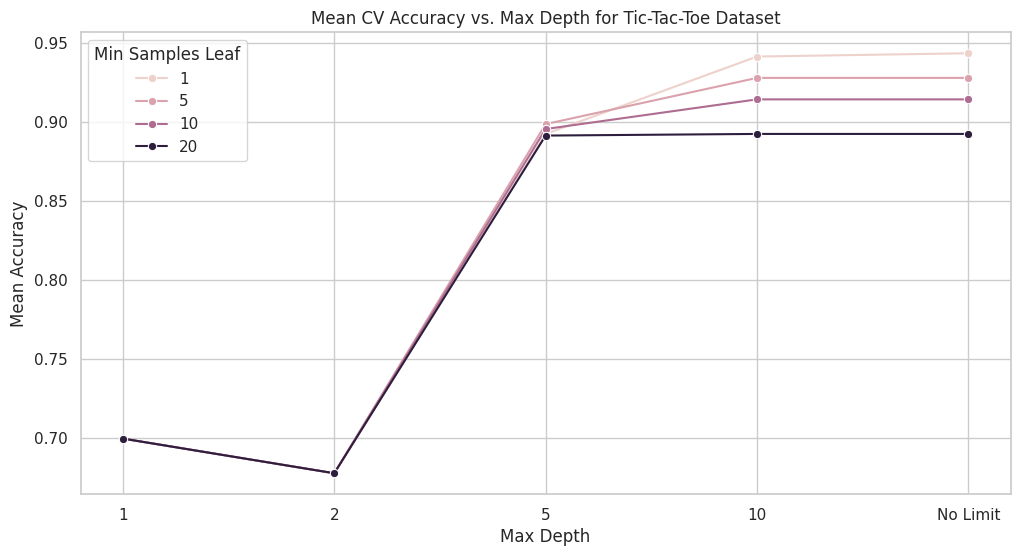

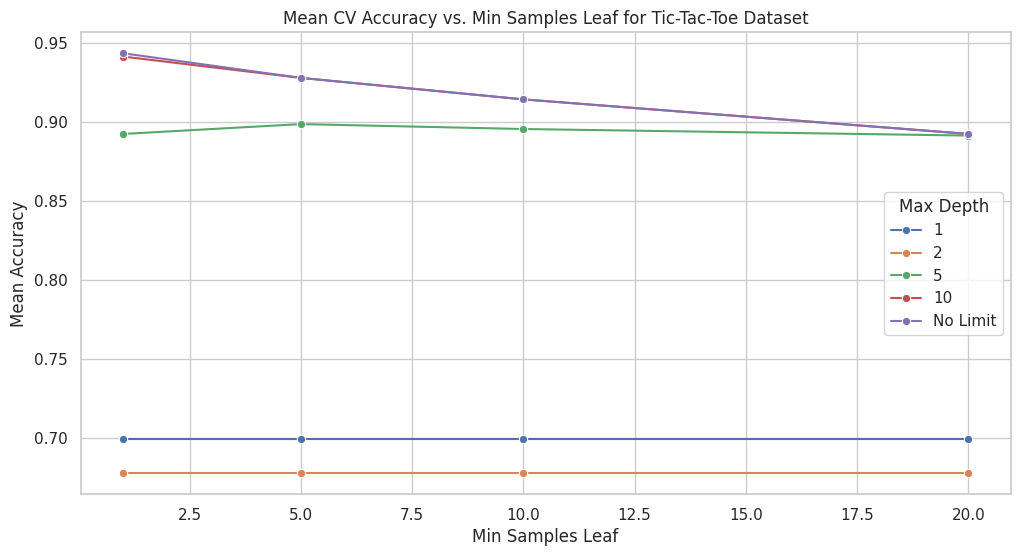

In [157]:
from sklearn.model_selection import KFold

config_tictactoe = dataset_configs['tic-tac-toe']
X_tictactoe_np, y_tictactoe_np = load_and_preprocess_dataset(
    config_tictactoe['url'],
    config_tictactoe['target_column_index'],
    config_tictactoe['target_mapping'],
    config_tictactoe['is_url']
)

max_depth_range = [1, 2, 5, 10, None]
min_samples_leaf_range = [1, 5, 10, 20]

def evaluate_decision_tree(X, y, max_depth, min_samples_leaf, feature_types, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        tree = DecisionTree(max_depth=max_depth, min_samples_leaf=min_samples_leaf, feature_types=feature_types)
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    return np.mean(accuracies)


results = []
feature_types_categorical = ['categorical'] * X_tictactoe_np.shape[1]

for md in max_depth_range:
    for msl in min_samples_leaf_range:
        print(f"Evaluating max_depth={md}, min_samples_leaf={msl}...")
        mean_accuracy = evaluate_decision_tree(
            X_tictactoe_np,
            y_tictactoe_np,
            max_depth=md,
            min_samples_leaf=msl,
            feature_types=feature_types_categorical
        )
        results.append({
            'max_depth': md,
            'min_samples_leaf': msl,
            'mean_accuracy': mean_accuracy
        })
        print(f"  Mean Accuracy: {mean_accuracy:.4f}")

results_df = pd.DataFrame(results)
print("\nEvaluation Results:")
print(results_df)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

results_df_plot = results_df.copy()
results_df_plot['max_depth_label'] = results_df_plot['max_depth'].apply(lambda x: str(int(x)) if pd.notna(x) else 'No Limit')

max_depth_order_for_plot = sorted([str(int(md)) for md in max_depth_range if md is not None], key=int) + ['No Limit']
results_df_plot['max_depth_label'] = pd.Categorical(results_df_plot['max_depth_label'], categories=max_depth_order_for_plot, ordered=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df_plot, x='max_depth_label', y='mean_accuracy', hue='min_samples_leaf', marker='o')
plt.title('Mean CV Accuracy vs. Max Depth for Tic-Tac-Toe Dataset')
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.legend(title='Min Samples Leaf')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df_plot, x='min_samples_leaf', y='mean_accuracy', hue='max_depth_label', marker='o', hue_order=max_depth_order_for_plot)
plt.title('Mean CV Accuracy vs. Min Samples Leaf for Tic-Tac-Toe Dataset')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.legend(title='Max Depth')
plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [140]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import OneHotEncoder
import gdown

def load_and_preprocess_dataset(data_path, target_column_index, target_mapping=None, is_url=True):
    if is_url:
        output_filename = data_path.split('/')[-1].split('?')[0]
        if not output_filename.endswith('.data') and not output_filename.endswith('.csv'):
             if 'agaricus-lepiota' in data_path: output_filename = 'mushrooms.data'
             elif 'tic-tac-toe' in data_path: output_filename = 'tic-tac-toe.data'
             elif 'car' in data_path: output_filename = 'car.data'
             elif 'nursery' in data_path: output_filename = 'nursery.data'

        gdown.download(data_path, output_filename, quiet=True)
        df = pd.read_csv(output_filename, header=None)
    else:
        df = pd.read_csv(data_path, header=None)

    le = LabelEncoder()
    for column in df.columns:
        df[column] = le.fit_transform(df[column])

    if target_column_index == 0:
        X = df.iloc[:, 1:]
        y = df.iloc[:, 0]
    else:
        X = df.drop(columns=df.columns[target_column_index])
        y = df.iloc[:, target_column_index]

    if target_mapping is not None:
        y = y.apply(lambda x: target_mapping[x] if x in target_mapping else x)

    X_np = X.values
    y_np = y.values

    return X_np, y_np

load_and_preprocess_dataset function defined.


In [141]:
from sklearn.preprocessing import OneHotEncoder

def apply_one_hot_encoding(X_features_np):
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    X_encoded = ohe.fit_transform(X_features_np)

    return X_encoded

apply_one_hot_encoding function defined.


In [142]:
dataset_configs = {
    'mushrooms': {
        'url': 'data1.csv',
        'target_column_index': 0,
        'target_mapping': None,
        'is_url': False
    },
    'tic-tac-toe': {
        'url': 'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data',
        'target_column_index': 9,
        'target_mapping': None,
        'is_url': True
    },
    'cars': {
        'url': 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
        'target_column_index': 6,
        'target_mapping': {
            0: 0,
            1: 1,
            2: 0,
            3: 1
        },
        'is_url': True
    },
    'nursery': {
        'url': 'https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data',
        'target_column_index': 8,
        'target_mapping': {
            0: 0,
            1: 1,
            2: 0,
            3: 1,
            4: 1
        },
        'is_url': True
    }
}

import json
print(json.dumps(dataset_configs, indent=4))

Dataset configurations defined:
{
    "mushrooms": {
        "url": "data1.csv",
        "target_column_index": 0,
        "target_mapping": null,
        "is_url": false
    },
    "tic-tac-toe": {
        "url": "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data",
        "target_column_index": 9,
        "target_mapping": null,
        "is_url": true
    },
    "cars": {
        "url": "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",
        "target_column_index": 6,
        "target_mapping": {
            "0": 0,
            "1": 1,
            "2": 0,
            "3": 1
        },
        "is_url": true
    },
    "nursery": {
        "url": "https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data",
        "target_column_index": 8,
        "target_mapping": {
            "0": 0,
            "1": 1,
            "2": 0,
            "3": 1,
            "4": 1
        },
        "is_url": true
    }


In [150]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.tree import DecisionTreeClassifier

scorer = make_scorer(accuracy_score)

algorithm_names = ['MyTree_Real', 'MyTree_Categorical', 'MyTree_OHE', 'Sklearn_Tree']
dataset_names = list(dataset_configs.keys())

results_df = pd.DataFrame(index=dataset_names, columns=algorithm_names)

for dataset_name, config in dataset_configs.items():
    print(f"\nProcessing dataset: {dataset_name}")

    X_np, y_np = load_and_preprocess_dataset(
        config['url'],
        config['target_column_index'],
        config['target_mapping'],
        config['is_url']
    )

    feature_types_real = ['real'] * X_np.shape[1]
    my_tree_real = DecisionTree(feature_types=feature_types_real)
    scores_real = cross_val_score(my_tree_real, X_np, y_np, cv=10, scoring=scorer)
    results_df.loc[dataset_name, 'MyTree_Real'] = scores_real.mean()
    print(f"  MyTree_Real Mean Accuracy: {scores_real.mean():.4f}")

    feature_types_categorical = ['categorical'] * X_np.shape[1]
    my_tree_categorical = DecisionTree(feature_types=feature_types_categorical)
    scores_categorical = cross_val_score(my_tree_categorical, X_np, y_np, cv=10, scoring=scorer)
    results_df.loc[dataset_name, 'MyTree_Categorical'] = scores_categorical.mean()
    print(f"  MyTree_Categorical Mean Accuracy: {scores_categorical.mean():.4f}")

    X_ohe = apply_one_hot_encoding(X_np)
    feature_types_ohe = ['real'] * X_ohe.shape[1]
    my_tree_ohe = DecisionTree(feature_types=feature_types_ohe)
    scores_ohe = cross_val_score(my_tree_ohe, X_ohe, y_np, cv=10, scoring=scorer)
    results_df.loc[dataset_name, 'MyTree_OHE'] = scores_ohe.mean()
    print(f"  MyTree_OHE Mean Accuracy: {scores_ohe.mean():.4f}")

    sklearn_tree = DecisionTreeClassifier(random_state=42)
    scores_sklearn = cross_val_score(sklearn_tree, X_np, y_np, cv=10, scoring=scorer)
    results_df.loc[dataset_name, 'Sklearn_Tree'] = scores_sklearn.mean()
    print(f"  Sklearn_Tree Mean Accuracy: {scores_sklearn.mean():.4f}")

print("\nEvaluation complete. Results DataFrame:")
print(results_df)


Processing dataset: mushrooms
  MyTree_Real Mean Accuracy: 0.9993
  MyTree_Categorical Mean Accuracy: 1.0000
  MyTree_OHE Mean Accuracy: 0.9996
  Sklearn_Tree Mean Accuracy: 0.9604

Processing dataset: tic-tac-toe
  MyTree_Real Mean Accuracy: 0.4707
  MyTree_Categorical Mean Accuracy: 0.5425
  MyTree_OHE Mean Accuracy: 0.5446
  Sklearn_Tree Mean Accuracy: 0.7717

Processing dataset: cars
  MyTree_Real Mean Accuracy: 0.9397
  MyTree_Categorical Mean Accuracy: 0.9675
  MyTree_OHE Mean Accuracy: 0.9195
  Sklearn_Tree Mean Accuracy: 0.9427

Processing dataset: nursery
  MyTree_Real Mean Accuracy: 0.9997
  MyTree_Categorical Mean Accuracy: 0.9998
  MyTree_OHE Mean Accuracy: 0.9995
  Sklearn_Tree Mean Accuracy: 0.9997

Evaluation complete. Results DataFrame:
            MyTree_Real MyTree_Categorical MyTree_OHE Sklearn_Tree
mushrooms      0.999261                1.0   0.999631     0.960384
tic-tac-toe    0.470691             0.5425   0.544616     0.771678
cars            0.93974           0

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**
Алгоритмы демонстрируют разное ранжирование в зависимости от набора данных. Нет лучшего алгоритма для всех случаев. Например, для Mushrooms и Nursery MyTree_Categorical показал наилучшие результаты, что указывает на высокую эффективность его специализированного подхода к категориальным признакам. Другие реализации MyTree также очень хороши, в то время как Sklearn_Tree был немного ниже (особенно на Mushrooms). В то время как в Tic-tac-toe Sklearn_Tree значительно превосходит все кастомные реализации (0.7717 против 0.5446 для MyTree_OHE и 0.5425 для MyTree_Categorical). MyTree_Real показал худший результат. В итоге всё зависит от данных. Реализованные в работе алгоритмы хорошо работают с категориальными признаками, потому что заточены под них. Но когда мы превращаем категории в числа, алгоритм начинает работать с ними как с непрерывными величинами, и это часто приводит к ошибкам. Sklearn же использует более сложную внутреннюю оптимизацию, которая лучше справляется со специфичными данными, как в примере с крестиками-ноликами. Чтобы улучшить реализованные алгоритмы, нужно выбирать параметры, чтобы получить оптимальные настройки. В идеале научить наши деревья лучше обрабатывать сложные случаи, возможно, даже объединяя их в ансамбли.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

In [ ]:
#### Кошмар :(